In [1]:
from model import Net
from dataset import CDEDataset
from torchvision import transforms
import torch
import os
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

if torch.cuda.is_available(): 
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
device

device(type='cuda', index=0)

In [2]:
net = Net([(512,2),(512,2),(512,2),(256,2), (128,2), (64,2)], 23, 512).to(device)
net

Net(
  (vgg_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

In [3]:

root_ims = 'ShanghaiTech/ShanghaiTech/part_A/train_data/images'
root_ann = 'ShanghaiTech/ShanghaiTech/part_A/train_data/density_gt'
im_list = os.listdir(root_ims)
#train = CDEDataset(im_list,root_ims,root_ann, transform  = transforms.ToTensor())
train = CDEDataset(im_list,root_ims,root_ann, transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ]))

root_ims = 'ShanghaiTech/ShanghaiTech/part_A/test_data/images'
root_ann = 'ShanghaiTech/ShanghaiTech/part_A/test_data/density_gt'
im_list = os.listdir(root_ims)
#test = CDEDataset(im_list,root_ims,root_ann, transform  = transforms.ToTensor(), train=False)
test = CDEDataset(im_list,root_ims,root_ann, transform  = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ]))


In [4]:
train_dataloader = DataLoader(train, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test, batch_size=1, shuffle=True)

In [5]:

train_dataloader = DataLoader(train, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test, batch_size=1, shuffle=True)

criterion = nn.MSELoss(reduction='sum').to(device)# same as nn.MSELoss(size_average=False)
optimizer = optim.SGD(net.parameters(), lr=1e-7, momentum=0.9)

num_epochs = 10

for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print(running_loss/300)

print('Finished Training')


907.7263268947602
905.6390612840653
902.3835984706878
900.8500003576279
902.3669988632203
899.5641784191132
896.3840287685395
892.3614181041718
890.8941770553589
886.3059293031693
Finished Training


In [41]:
def show_tensor_image(f):
    plt.imshow(f.permute(1, 2, 0))

In [42]:
im =train[8][0].unsqueeze(0).to(device)
im.shape
a = net(im)


In [43]:
im.shape

torch.Size([1, 3, 675, 1024])

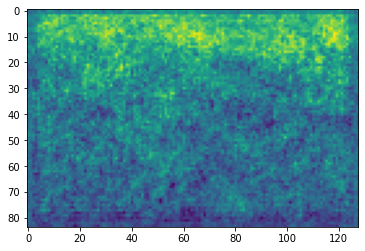

In [44]:
plt.imshow(a[0][0].cpu().detach().numpy())

In [45]:
sum(sum(a[0][0].cpu().detach().numpy()))

747.1687107086182

In [46]:
sum(sum(train[8][1][0].detach().numpy()))

581.4182490110397

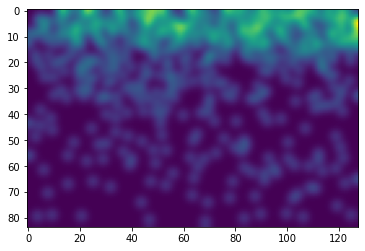

In [47]:
plt.imshow(train[8][1][0].detach().numpy())

In [11]:
train[23][0].unsqueeze(0).shape

<PIL.Image.Image image mode=RGB size=442x293 at 0x7F44C508FB20>


torch.Size([1, 3, 146, 221])

In [ ]:
gt = train[23][1].unsqueeze(0)

In [ ]:
gt.shape

In [ ]:
a.shape

In [ ]:
torch.sum(torch.square(gt - a))